<a href="https://colab.research.google.com/github/ppkgtmm/emotion/blob/main/goemo_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import re
import nltk
from unicodedata import normalize
import collections

In [ ]:
nltk.download('punkt')
from nltk import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
cols = ['text','target']

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/emotion/data/goemotions.csv')[cols]
data.sample(5)

,text,target
39534,At least you can admit you value one innocent ...,approval
35191,Ask and you shall receive. Thanks man,approval
102532,"It’s your choice what you choose to do, but ju...",love
145188,How has nobody in the coaching staff tried to ...,neutral
128769,Too bad it's the wrong kind of blows!!!,sadness


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164954 entries, 0 to 164953
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    164954 non-null  object
 1   target  164954 non-null  object
dtypes: object(2)
memory usage: 2.5+ MB


In [ ]:
data.isnull().any()

text      False
target    False
dtype: bool

In [ ]:
target_dist = data.groupby('target').count().reset_index()
target_dist['proportion'] = target_dist['text'] / sum(list(target_dist['text']))
target_dist.head()

,target,text,proportion
0,admiration,9912,0.060089
1,amusement,5180,0.031403
2,anger,5644,0.034216
3,annoyance,10024,0.060768
4,approval,13235,0.080234


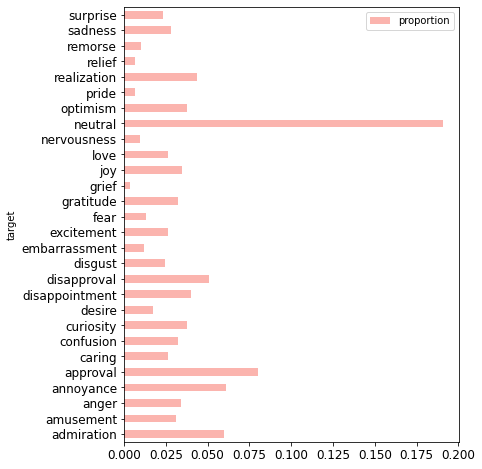

In [ ]:
target_dist.plot(x='target', y='proportion', kind='barh', rot=0, \
                 colormap='Pastel1', fontsize=12, figsize=(6,8))

In [ ]:
mapping = {
"anger": ["anger", "annoyance", "disapproval"],
"disgust": ["disgust"],
"fear": ["fear", "nervousness"],
"joy": ["joy", "amusement", "approval", "excitement", "gratitude",  "love", "optimism", "relief", "pride", "admiration", "desire", "caring"],
"sadness": ["sadness", "disappointment", "embarrassment", "grief",  "remorse"],
"surprise": ["surprise", "realization", "confusion", "curiosity"]
}

In [ ]:
df ={ }

In [ ]:
for key in mapping.keys():
  df[key] = data[data['target'].isin(mapping[key])]
  df[key]['target'] = key

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
mapped = pd.concat([v for k,v in df.items()])

In [ ]:
mapped.head(5)

,text,target
15092,I thought it was very good. The guy was one si...,anger
15093,Lol. Build your own or make some tweaks to the...,anger
15094,his traps hide the fucking sun.,anger
15098,Disgusting!!! Where were the adults? The adult...,anger
15101,"TAKE ME TO YOUR CRYPT, I WANT TO PAY MY RESPECTS!",anger


In [ ]:
mapped.tail(5)

,text,target
133503,Wow did you really just scam me😔,surprise
133504,> you're probably a little bit of a closeted n...,surprise
133505,OH YEAH!!,surprise
133506,Yeh? It just changed on me last night after I ...,surprise
133507,Guess I hit a triple,surprise


In [ ]:
mapped = mapped.drop_duplicates(subset=['text','target'], keep='last')

In [ ]:
mapped.shape

(89564, 2)

In [ ]:
target_dist = mapped.groupby('target').count().reset_index()
target_dist['proportion'] = target_dist['text'] / sum(list(target_dist['text']))
target_dist.head()

,target,text,proportion
0,anger,17771,0.198417
1,disgust,4053,0.045253
2,fear,3089,0.034489
3,joy,35588,0.397347
4,sadness,11487,0.128255


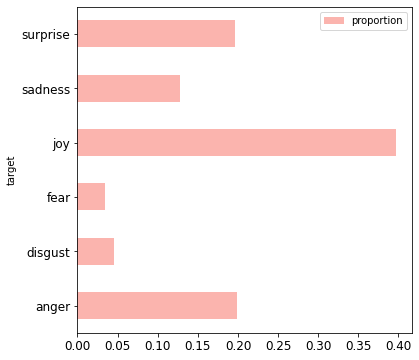

In [ ]:
target_dist.plot(x='target', y='proportion', kind='barh', rot=0, \
                 colormap='Pastel1', fontsize=12, figsize=(6,6))

In [ ]:
mapped.describe().transpose()

,count,unique,top,freq
text,89564,53490,Yeah I probably would've started crying on the...,6
target,89564,6,joy,35588


In [ ]:
duplicates = pd.concat(rows for _, rows in mapped.groupby('text') \
                       if len(rows) > 1)
duplicates.head()

,text,target
26048,"""If you don't wear BROWN AND ORANGE...YOU DON...",anger
111030,"""If you don't wear BROWN AND ORANGE...YOU DON...",joy
103029,"""What do Scottish people look like?"" How I wo...",joy
58927,"""What do Scottish people look like?"" How I wo...",surprise
75169,>sexuality shouldn’t be a grouping category I...,anger


In [ ]:
duplicates.groupby('text').nunique().reset_index().sort_values('target').tail()

,text,target
18015,There is something legitimately wrong with you,6
15067,SWTOR is horrible when you want to play togeth...,6
4450,HAS THE WHOLE WORLD GONE CRAZY‽ AM I THE ONLY ...,6
17225,That's what I said! Except the bad person part...,6
3216,Doctor charged 400 bucks for a blood pressure ...,6


In [ ]:
copy = mapped.copy()
copy['word_count'] = copy['text'].apply(lambda x: len(x.split(' ')))

In [ ]:
def avg_word_length(text):
    words = text.split(' ')
    length = [len(w) for w in words]
    return math.ceil(sum(length) / len(length))

copy['avg_word_length'] = copy['text'].apply(avg_word_length)

In [ ]:
copy.head(5)

,text,target,word_count,avg_word_length
15092,I thought it was very good. The guy was one si...,anger,15,4
15093,Lol. Build your own or make some tweaks to the...,anger,11,5
15094,his traps hide the fucking sun.,anger,6,5
15098,Disgusting!!! Where were the adults? The adult...,anger,16,6
15101,"TAKE ME TO YOUR CRYPT, I WANT TO PAY MY RESPECTS!",anger,11,4


In [ ]:
copy.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
word_count,89564.0,13.842995,6.594036,1.0,8.0,14.0,19.0,33.0
avg_word_length,89564.0,4.891809,0.891409,1.0,4.0,5.0,5.0,50.0


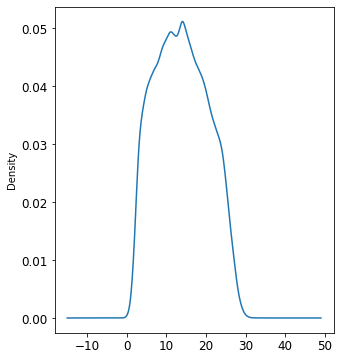

In [ ]:
copy.word_count.plot(kind='kde', fontsize=12, figsize=(5,6))

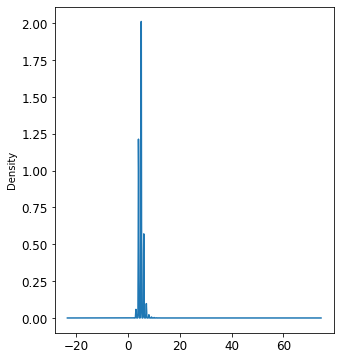

In [ ]:
copy.avg_word_length.plot(kind='kde', fontsize=12, figsize=(5,6))

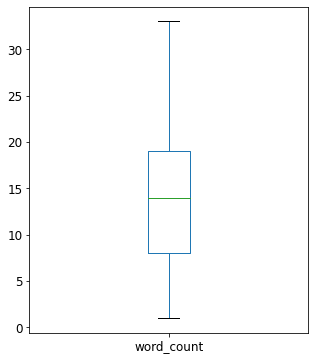

In [ ]:
copy.word_count.plot(kind='box', fontsize=12, figsize=(5,6))

In [ ]:
reserved_words = ["EMAIL", "NUMBER", "MENTION", "URL"]
token_dict = {
            "ca": "can",
            "wo": "will",
            "sha": "shall",
            "'ve": "have",
            "'ll": "will",
            "'m": "am",
            "n't": "not",
            "'re": "are",
        }
word_dict = {
            "cant": "can not",
            "couldnt": "could not",
            "wont": "will not",
            "pls": "please",
            "plz": "please",
            "youre": "you are",
            "theyre": "they are",
            "ive": "I have",
            "havent": "have not",
            "hasnt": "has not",
            "hadnt": "had not",
            "im": "I am",
            "didnt": "did not",
            "dont": "do not",
            "doesnt": "does not",
            "gotta": "got to",
            "wanna": "want to",
            "gonna": "going to",
            "wannabe": "want to be",
            "cannot": "can not",
        }

In [ ]:
def substitute(doc):
        doc = re.sub(r"<br />", " ", doc)
        doc = re.sub(r"\S+@\S+", " EMAIL ", doc)
        doc = re.sub(r"@\S+", " MENTION ", doc)
        doc = re.sub(r"https?:\S+|http?:\S+", " URL ", doc)
        doc = re.sub(r"(\d+\-\d+)|\d+", " NUMBER ", doc)
        doc = re.sub(r"[^A-Za-z']", " ", doc)

        return doc

def expand(token):
        if token in reserved_words:
            return token
        token = token.lower()
        if token.lower().strip() == "let's":
            return "let us"

        if token.lower().strip() == "'twas":
            return "it was"

        if word_dict.get(token, None):
            return word_dict.get(token)

        tokens = word_tokenize(token)
        if len(tokens) == 1:
            return word_dict.get(tokens[0], tokens[0])
        for i in range(len(tokens)):
            tokens[i] = token_dict.get(tokens[i], tokens[i])

        return " ".join(tokens)

def preprocess(doc):
        doc = normalize('NFD',doc).encode('ascii', 'ignore').decode('utf-8')
        doc = substitute(doc)
        tokens = doc.split()
        doc = " ".join([expand(w) for w in tokens])

        tokens = doc.split()
        tokens = [word for word in tokens if word.isalpha()]

        tokens = [
            word.lower() if word not in reserved_words else word for word in tokens
        ]

        return " ".join(tokens)

In [ ]:
preprocess("😂 @mama124 Im gonna enter http:bit.ly.12673/ab \
for 30th time :| don't know why cant i České Budějovic á Ś cé")

'MENTION i am going to enter URL for NUMBER th time do not know why can not i ceske budejovic a s ce'

In [ ]:
%%time 
copy['text'] = copy['text'].apply(preprocess)

CPU times: user 1min 23s, sys: 216 ms, total: 1min 23s
Wall time: 1min 24s


In [ ]:
duplicates = pd.concat(rows for _, rows in copy.groupby('text') \
                       if len(rows) > 1)
duplicates.head()

,text,target,word_count,avg_word_length
33205,MENTION sorry if i used the wrong pronoun,joy,8,7
128079,MENTION sorry if i used the wrong pronoun,sadness,8,7
112614,NUMBER NUMBER NUMBER all deuce could this be a...,joy,9,5
58187,NUMBER NUMBER NUMBER all deuce could this be a...,surprise,9,5
29952,NUMBER NUMBER NUMBER its completely dead you s...,anger,18,5


In [ ]:
duplicates.groupby('text')['target'].nunique().reset_index() \
.sort_values('target').tail()

,text,target
13781,name will probably get something as worse as n...,6
17933,swtor is horrible when you want to play togeth...,6
23573,yeah all they have to do is ask for absolution...,6
14209,no that horrible news for galaxy fans lol,6
13378,name has come down with a terrible sickness wh...,6


In [ ]:
temp = copy

In [ ]:
temp = temp.drop_duplicates(subset=['text'])

In [ ]:
# ValueError: No objects to concatenate
# duplicates = pd.concat(rows for _, rows in temp.groupby('text') \
#                        if len(rows) > 1)
# duplicates.head()

In [108]:
temp[['text']].describe().transpose()

,count,unique,top,freq
text,52991,52991,they definitely did not do name mode justice w...,1


In [112]:
target_dist = temp.groupby('target')['text'].count().reset_index()
target_dist['proportion'] = target_dist['text'] / sum(list(target_dist['text']))
target_dist.head()

,target,text,proportion
0,anger,17707,0.334151
1,disgust,1196,0.022570
2,fear,1688,0.031854
3,joy,25842,0.487668
4,sadness,2319,0.043762


In [ ]:
# temp[['text','target']] \
# .to_csv('/content/drive/MyDrive/emotion/data/go_preprocessed.csv')